In [131]:
#Importer les librairies necessaires:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from collections import Counter
from imblearn.over_sampling import BorderlineSMOTE

In [79]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [132]:
import pyodbc
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=DJO;'
                      'Database=transportSA;'
                      'Trusted_Connection=yes;')

data = pd.read_sql_query('SELECT cast(CODE_STIF_TRNS as numeric) as CODE_STIF_TRNS  , cast(CAT_JOUR as numeric) as CAT_JOUR , TRNC_HORR_60 , pourc_validations From surfaceSA',conn)

In [133]:
data

,CODE_STIF_TRNS,CAT_JOUR,TRNC_HORR_60,pourc_validations
0,100.0,0.0,10H-11H,"5,4"
1,100.0,1.0,23H-0H,1
2,100.0,0.0,2H-3H,"0,01"
3,100.0,0.0,10H-11H,"5,63"
4,100.0,1.0,6H-7H,"3,08"
...,...,...,...,...
65530,100.0,0.0,22H-23H,"1,02"
65531,100.0,0.0,14H-15H,"4,86"
65532,100.0,0.0,8H-9H,"9,8"
65533,100.0,0.0,10H-11H,"5,4"


In [134]:
# Pas de valeurs manquantes
data.isna().sum()

CODE_STIF_TRNS       0
CAT_JOUR             0
TRNC_HORR_60         0
pourc_validations    0
dtype: int64

In [135]:
data["TRNC_HORR_60"]=data["TRNC_HORR_60"].map({"7H-8H":0, "8H-9H":1,"18H-19H":2, "17H-18H":3,"16H-17H":4,"6H-7H":5,"9H-10H":6,"12H-13H":7,"13H-14H":8,"15H-16H":9,"19H-20H":10,"11H-12H":11,"14H-15H":12,"10H-11H":14,"20H-21H":15,"5H-6H":16,"21H-22H":17,"22H-23H":18,"23H-0H":17,"0H-1H":18,"4H-5H":19,"1H-2H":20,"2H-3H":21,"3H-4H":22}) #convert Gender values into numerical

In [136]:
data

,CODE_STIF_TRNS,CAT_JOUR,TRNC_HORR_60,pourc_validations
0,100.0,0.0,14,"5,4"
1,100.0,1.0,17,1
2,100.0,0.0,21,"0,01"
3,100.0,0.0,14,"5,63"
4,100.0,1.0,5,"3,08"
...,...,...,...,...
65530,100.0,0.0,18,"1,02"
65531,100.0,0.0,12,"4,86"
65532,100.0,0.0,1,"9,8"
65533,100.0,0.0,14,"5,4"


In [137]:
# diviser les données en attributs et étiquettes (labes)
X = C.iloc[:, 0:3]
y = C.iloc[:, 3:4]

In [138]:
X

,CODE_STIF_TRNS,CAT_JOUR,TRNC_HORR_60
0,100.0,0.0,14
1,100.0,1.0,17
2,100.0,0.0,21
3,100.0,0.0,14
4,100.0,1.0,5
...,...,...,...
65530,100.0,0.0,18
65531,100.0,0.0,12
65532,100.0,0.0,1
65533,100.0,0.0,14


In [139]:
y['pourc_validations']

0         5,4
1           1
2        0,01
3        5,63
4        3,08
         ... 
65530    1,02
65531    4,86
65532     9,8
65533     5,4
65534       1
Name: pourc_validations, Length: 65535, dtype: object

In [140]:
for i in range (len(y)):
    y['pourc_validations'][i]=y['pourc_validations'][i].replace(',','.')
    y['pourc_validations'][i]=float(y['pourc_validations'][i])   
print(y['pourc_validations'].mean())

6.550895857175619


In [141]:
for i in range (len(y)):
    if y['pourc_validations'][i]>6.54:
        y['pourc_validations'][i]=0
        print(y['pourc_validations'][i])
    else:
        y['pourc_validations'][i]=1
        print(y['pourc_validations'][i])

1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
0
1
1
1
1
0
1
1
0
1
0
0
1
0
1
1
1
1
1
1
0
1
1
1
1
0
0
1
1
0
1
1
0
1
1
1
1
0
1
0
1
1
1
0
1
1
1
1
1
0
1
1
1
0
1
0
0
1
1
1
0
1
1
0
1
1
1
1
0
1
0
1
0
1
1
0
1
1
1
1
0
0
0
0
1
1
0
0
1
1
1
1
1
1
0
1
1
0
1
0
1
1
0
1
0
0
0
1
0
0
1
0
0
1
0
1
1
0
0
1
0
0
1
1
0
1
0
1
1
0
1
1
0
0
1
1
1
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
0
1
1
0
1
0
1
1
1
1
0
0
0
0
0
1
0
1
1
1
1
0
0
1
1
1
1
1
1
0
1
0
1
0
1
0
1
1
1
1
1
0
1
1
1
1
0
1
1
0
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
0
0
0
1
1
1
0
1
0
0
1
1
1
1
1
0
1
1
1
1
1
1
0
0
1
1
0
0
1
0
1
1
1
1
0
0
1
1
1
0
0
0
1
1
1
1
1
0
1
1
1
1
1
1
0
1
1
1
1
1
1
1
0
0
1
0
1
0
0
0
0
0
1
0
0
0
0
1
1
1
1
1
1
0
1
0
0
1
0
0
0
1
1
1
0
1
1
1
0
1
0
0
0
0
1
0
1
1
0
1
0
1
0
1
1
1
0
1
1
1
0
1
1
1
0
1
0
1
0
1
0
1
1
0
1
0
1
0
1
1
1
1
1
0
1
1
0
1
0
0
0
0
0
1
0
0
0
1
0
0
0
1
0
1
1
1
1
1
0
0
0
0
1
1
1
0
1
0
1
1
1
0
0
1
1
0
0
1
0
0
0
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
0
0
1
1
0
1
1
0
0
1
1
1
0
0
0
1
1
0
1
1
1
0
1
1
0
0
0
0
1
1
1
0
0
0
1
1
1
1
1
0
0
0
1
0
1
0
0
0
1
1
1
1
0
0
0


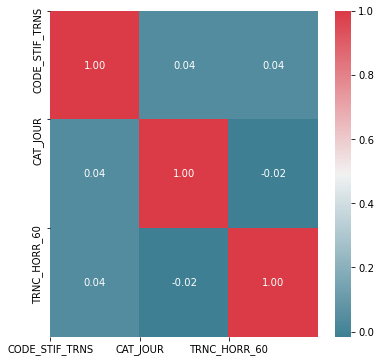

In [142]:
#graphique - croisement deux à deux des variables
#Create Correlation matrix
corr = data.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(6,6))
#Generate Color Map
colormap = sns.diverging_palette(220, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [143]:
y=y.astype('int')
X=X.astype('int')

In [144]:
# diviser les données en 80% training set  et 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [145]:
X_train

,CODE_STIF_TRNS,CAT_JOUR,TRNC_HORR_60
47561,293,1,20
1095,100,1,20
40928,67,1,10
38376,100,4,6
4925,293,3,0
...,...,...,...
45891,78,1,2
52416,64,0,21
42613,293,0,22
43567,251,2,4


In [146]:
 y_train

,pourc_validations
47561,1
1095,1
40928,0
38376,1
4925,0
...,...
45891,1
52416,1
42613,1
43567,0


In [147]:
 X_train.value_counts()

CODE_STIF_TRNS  CAT_JOUR  TRNC_HORR_60
100             0         17              348
                          18              326
                1         17              322
                3         17              309
                          18              298
                                         ... 
78              1         5                 1
                          6                 1
                          7                 1
227             3         11                1
501             1         16                1
Length: 5748, dtype: int64

In [148]:
y_train=y_train.astype('int')

In [149]:
X_train=X_train.astype('int')

In [150]:
y_test=y_test.astype('int')
X_test=X_test.astype('int')

In [151]:
#Entrainer le modèle svm
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [152]:
from sklearn.metrics import classification_report
y_pred_svc_1 = svm.predict(X_test)
print(classification_report(y_pred_svc_1, y_test))

              precision    recall  f1-score   support

           0       0.67      0.61      0.64      5733
           1       0.72      0.76      0.74      7374

    accuracy                           0.70     13107
   macro avg       0.69      0.69      0.69     13107
weighted avg       0.69      0.70      0.69     13107



In [128]:
svm = SVC(kernel="sigmoid")
svm.fit(X_train, y_train)
from sklearn.metrics import classification_report
y_pred_svc_4 = svm.predict(X_test)
print(classification_report(y_pred_svc_4, y_test))

              precision    recall  f1-score   support

           0       0.57      0.57      0.57     12923
           1       0.57      0.58      0.57     12895

    accuracy                           0.57     25818
   macro avg       0.57      0.57      0.57     25818
weighted avg       0.57      0.57      0.57     25818



In [153]:
svm = SVC(kernel="rbf")
svm.fit(X_train, y_train)
from sklearn.metrics import classification_report
y_pred = svm.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.67      0.61      0.64      5733
           1       0.72      0.76      0.74      7374

    accuracy                           0.70     13107
   macro avg       0.69      0.69      0.69     13107
weighted avg       0.69      0.70      0.69     13107



In [92]:
def BSMOTE(X,y):
# summarize class distribution
    counter = Counter(y)
    print(counter)
# transform the dataset
    X, y = BorderlineSMOTE().fit_resample(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
# summarize the new class distribution
    counter = Counter(y)
    print(counter)
    return X_train, X_test, y_train, y_test

In [130]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train)

KeyboardInterrupt: 

In [93]:
# diviser les données en 80% training set  et 20% test set
X_train, X_test, y_train, y_test =  BSMOTE(X,y)

Counter({'pourc_validations': 1})


ValueError: Unknown label type: 'unknown'